## Import Libraries

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

## Load Dataset

In [13]:
df = pd.read_csv("housing.csv")


## Drop rows with missing values

In [14]:
df_clean = df.dropna()

## One-hot encode 'ocean_proximity'

In [15]:
encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_cols = encoder.fit_transform(df_clean[['ocean_proximity']])
encoded_df = pd.DataFrame(encoded_cols, columns=encoder.get_feature_names_out(['ocean_proximity']))


## Combine encoded data with numerical features

In [16]:
X = pd.concat([df_clean.drop(['median_house_value', 'ocean_proximity'], axis=1).reset_index(drop=True),
               encoded_df], axis=1)
y = df_clean['median_house_value']

## Train/test split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Train linear regression model

In [18]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## Predict and evaluate

In [19]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")

Mean Squared Error: 4802173538.604161
Root Mean Squared Error: 69297.71669113032


## Identify 5 worst predictions

In [20]:
errors = np.abs(y_test - y_pred)
worst_indices = errors.sort_values(ascending=False).head(5).index
worst_samples = df_clean.iloc[worst_indices]
print("\nFive Worst Predictions:")
print(worst_samples[['median_house_value', 'median_income', 'total_rooms', 'housing_median_age', 'ocean_proximity']])


Five Worst Predictions:
       median_house_value  median_income  total_rooms  housing_median_age  \
12256            139300.0         2.6830       2228.0                15.0   
4535             141100.0         2.5268       1550.0                44.0   
16802            302600.0         4.7361       2189.0                41.0   
4876             225000.0         1.2989       1407.0                25.0   
10555            241800.0         4.5909       2497.0                16.0   

      ocean_proximity  
12256          INLAND  
4535        <1H OCEAN  
16802      NEAR OCEAN  
4876        <1H OCEAN  
10555       <1H OCEAN  


## Plot actual vs predicted values

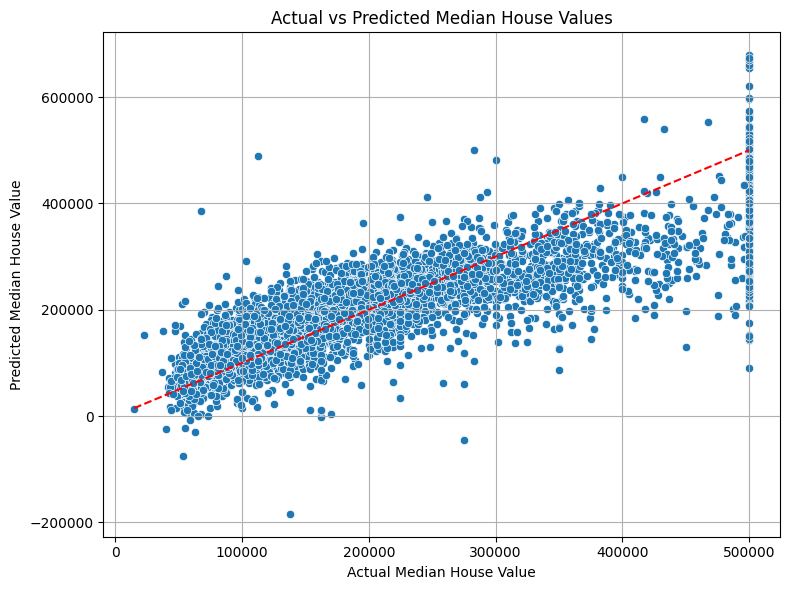

In [21]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Median House Value')
plt.ylabel('Predicted Median House Value')
plt.title('Actual vs Predicted Median House Values')
plt.grid(True)
plt.tight_layout()
plt.show()